# Objetivo

Agora, nosso objetivo principal é a partir das tabelas criadas, transformá-las em features que serão utilizadas nos modelos de machine learning. 

Para isso, precisamos primeiro transformar nossa tabela para a granularidade de vendedor e horizonte temporal desejada. No caso, a nível vendedor e semestral.

Após isso, criaremos as features que serão utlizadas no algoritmo.

# Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lendo as tabelas

In [2]:
catalogo = "../data/interim/"

# Tabela fato de pedidos
df_fct_ordem_pedido_raw= pd.read_csv(f"{catalogo}tb_fct_ordem_pedido.csv")

# Tabela fato de pedidos com vendedores e categorias
df_fct_ordem_vendedor_cat_raw = pd.read_csv(f"{catalogo}tb_fct_ordem_vendedor_cat.csv")

# Limpeza dos dados

In [3]:
df_fct_ordem_vendedor_cat_raw.head()

,order_purchase_timestamp,order_id,order_status,seller_id,product_category_name,items_sold,unique_items_sold,total_price,avg_price,min_price,max_price,median_price,std_price,total_freight_value,avg_freight_value,min_freight_value,max_freight_value,median_freight_value,std_freight_value
0,2016-09-04 21:15:19,2e7a8482f6fb09756ca50c10d7bfc047,shipped,1554a68530182680ad5c8b042c3ab563,moveis_decoracao,2,2,72.89,36.445,32.90,39.99,36.445,5.013387,63.34,31.67,31.67,31.67,31.67,0.0
1,2016-09-05 00:15:34,e5fa5a7210941f7d56d0208e4e071d35,canceled,a425f92c199eb576938df686728acd20,telefonia,1,1,59.50,59.500,59.50,59.50,59.500,NaN,15.56,15.56,15.56,15.56,15.56,NaN
2,2016-09-15 12:16:38,bfbd0f9bdef84302105ad712db648a6c,delivered,ecccfa2bb93b34a3bf033cc5d1dcdc69,beleza_saude,3,1,134.97,44.990,44.99,44.99,44.990,0.000000,8.49,2.83,2.83,2.83,2.83,0.0
3,2016-10-02 22:07:52,71303d7e93b399f5bcd537d124c0bcfa,canceled,25e6ffe976bd75618accfe16cefcbd0d,bebes,1,1,100.00,100.000,100.00,100.00,100.000,NaN,9.34,9.34,9.34,9.34,9.34,NaN
4,2016-10-03 09:44:50,3b697a20d9e427646d92567910af6d57,delivered,522620dcb18a6b31cd7bdf73665113a9,relogios_presentes,1,1,29.90,29.900,29.90,29.90,29.900,NaN,15.56,15.56,15.56,15.56,15.56,NaN


In [4]:
df_fct_ordem_vendedor_cat_raw.info()
print(df_fct_ordem_vendedor_cat_raw.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98762 entries, 0 to 98761
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_purchase_timestamp  98762 non-null  object 
 1   order_id                  98762 non-null  object 
 2   order_status              98762 non-null  object 
 3   seller_id                 98762 non-null  object 
 4   product_category_name     98762 non-null  object 
 5   items_sold                98762 non-null  int64  
 6   unique_items_sold         98762 non-null  int64  
 7   total_price               98762 non-null  float64
 8   avg_price                 98762 non-null  float64
 9   min_price                 98762 non-null  float64
 10  max_price                 98762 non-null  float64
 11  median_price              98762 non-null  float64
 12  std_price                 8594 non-null   float64
 13  total_freight_value       98762 non-null  float64
 14  avg_fr

In [5]:
# Verificando a distribuição
df_fct_ordem_vendedor_cat_raw.describe(exclude='object')

,items_sold,unique_items_sold,total_price,avg_price,min_price,max_price,median_price,std_price,total_freight_value,avg_freight_value,min_freight_value,max_freight_value,median_freight_value,std_freight_value
count,98762.00000,98762.000000,98762.000000,98762.000000,98762.000000,98762.000000,98762.000000,8594.000000,98762.000000,98762.000000,98762.000000,98762.000000,98762.000000,8594.000000
mean,1.12439,1.022306,135.802317,125.525473,125.314334,125.775090,125.502607,3.423178,22.516147,20.214300,20.156917,20.269352,20.215226,0.846794
std,0.50850,0.174632,208.481779,189.953901,189.919606,190.252944,189.952667,23.710957,21.310648,15.914323,15.924897,15.955886,15.918407,4.058099
min,1.00000,1.000000,0.850000,0.850000,0.850000,0.850000,0.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,1.000000,45.600000,41.892500,40.992500,41.900000,41.800000,0.000000,13.710000,13.270000,13.180000,13.320000,13.260000,0.000000
50%,1.00000,1.000000,84.990000,79.000000,79.000000,79.000000,79.000000,0.000000,17.090000,16.390000,16.350000,16.430000,16.390000,0.000000
75%,1.00000,1.000000,149.900000,139.900000,139.900000,139.900000,139.900000,0.000000,23.710000,21.300000,21.260000,21.380000,21.300000,0.000000
max,21.00000,7.000000,13440.000000,6735.000000,6735.000000,6735.000000,6735.000000,1173.090150,1794.960000,409.680000,409.680000,409.680000,409.680000,150.585460


In [6]:
df_fct_ordem_vendedor_cat_raw['product_category_name'].value_counts()

product_category_name
cama_mesa_banho                  9627
beleza_saude                     8863
esporte_lazer                    7772
informatica_acessorios           6763
moveis_decoracao                 6529
                                 ... 
la_cuisine                         13
cds_dvds_musicais                  12
pc_gamer                            8
fashion_roupa_infanto_juvenil       8
seguros_e_servicos                  2
Name: count, Length: 73, dtype: int64

In [7]:
pd.DataFrame(df_fct_ordem_vendedor_cat_raw['product_category_name'].value_counts()).sort_values(by='product_category_name')

,count
product_category_name,
agro_industria_e_comercio,182
alimentos,451
alimentos_bebidas,227
artes,202
artes_e_artesanato,23
...,...
sinalizacao_e_seguranca,141
tablets_impressao_imagem,79
telefonia,4224


In [8]:
# Renomeando categorias para agrupar as que parecem similares
df_fct_ordem_vendedor_cat = df_fct_ordem_vendedor_cat_raw.copy()

df_fct_ordem_vendedor_cat['product_category_name'] = (
    df_fct_ordem_vendedor_cat['product_category_name']
    .replace({
        'artes': 'artes_e_artesanato',
        'casa_conforto_2': 'casa_conforto',
        'eletrodomesticos_2': 'eletrodomesticos'
        }
    )
)

pd.DataFrame(df_fct_ordem_vendedor_cat['product_category_name'].value_counts()).sort_values(by='product_category_name')

,count
product_category_name,
agro_industria_e_comercio,182
alimentos,451
alimentos_bebidas,227
artes_e_artesanato,225
artigos_de_festas,39
...,...
sinalizacao_e_seguranca,141
tablets_impressao_imagem,79
telefonia,4224


# Filtro e agregação

In [9]:
# Filtrando apenas pedidos entregues e convertendo a coluna de data para o formato ano-mês
df_delivered_tmp = df_fct_ordem_vendedor_cat[df_fct_ordem_vendedor_cat['order_status'] == 'delivered']

df_delivered_tmp["purchase_date"] = pd.to_datetime(df_delivered_tmp["order_purchase_timestamp"]).dt.date

df_delivered_tmp["ano_mes"] = pd.to_datetime(df_delivered_tmp["purchase_date"]).dt.to_period('M')
df_delivered = df_delivered_tmp[["ano_mes", "seller_id","product_category_name","items_sold", "total_price"]]

/var/folders/d3/vx1qt6593sx6_kwhfbzxfc8c0000gn/T/ipykernel_82837/1474764261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivered_tmp["purchase_date"] = pd.to_datetime(df_delivered_tmp["order_purchase_timestamp"]).dt.date
/var/folders/d3/vx1qt6593sx6_kwhfbzxfc8c0000gn/T/ipykernel_82837/1474764261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivered_tmp["ano_mes"] = pd.to_datetime(df_delivered_tmp["purchase_date"]).dt.to_period('M')


In [10]:
df_delivered_tmp[df_delivered_tmp['seller_id'] == '001cca7ae9ae17fb1caed9dfb1094831'].sort_values(by='ano_mes')

,order_purchase_timestamp,order_id,order_status,seller_id,product_category_name,items_sold,unique_items_sold,total_price,avg_price,min_price,...,median_price,std_price,total_freight_value,avg_freight_value,min_freight_value,max_freight_value,median_freight_value,std_freight_value,purchase_date,ano_mes
1327,2017-02-04 19:06:04,3c655487f0c8e34cde2c7b67de8f08cc,delivered,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,1,1,99.9,99.9,99.9,...,99.9,NaN,21.15,21.15,21.15,21.15,21.15,NaN,2017-02-04,2017-02
2291,2017-02-18 23:26:24,eb188a175542057d90b3ca5628b7b5a0,delivered,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,5,1,499.5,99.9,99.9,...,99.9,0.0,74.35,14.87,14.87,14.87,14.87,0.0,2017-02-18,2017-02
2511,2017-02-23 11:42:38,67054420c38f2db9d12db40e122f02b2,delivered,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,1,1,99.9,99.9,99.9,...,99.9,NaN,16.40,16.40,16.40,16.40,16.40,NaN,2017-02-23,2017-02
2723,2017-02-27 16:23:21,ca1c186adb5522172d58df18800ee2a4,delivered,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,2,1,199.8,99.9,99.9,...,99.9,0.0,42.30,21.15,21.15,21.15,21.15,0.0,2017-02-27,2017-02
2743,2017-02-27 23:54:11,60d86bf6b567364b56335cb75262c00e,delivered,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,2,1,199.8,99.9,99.9,...,99.9,0.0,42.30,21.15,21.15,21.15,21.15,0.0,2017-02-27,2017-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68420,2018-04-12 22:27:23,b30a6793df66beef3870b532c09dee15,delivered,001cca7ae9ae17fb1caed9dfb1094831,construcao_ferramentas_construcao,1,1,112.0,112.0,112.0,...,112.0,NaN,62.39,62.39,62.39,62.39,62.39,NaN,2018-04-12,2018-04
72085,2018-04-28 08:25:04,9fc1497693771a80bd64e4226d7e9b74,delivered,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,1,1,129.0,129.0,129.0,...,129.0,NaN,35.91,35.91,35.91,35.91,35.91,NaN,2018-04-28,2018-04
83635,2018-06-20 08:50:03,b9ac97245b38bb678929cfbe68a37a5a,delivered,001cca7ae9ae17fb1caed9dfb1094831,construcao_ferramentas_construcao,1,1,112.0,112.0,112.0,...,112.0,NaN,60.01,60.01,60.01,60.01,60.01,NaN,2018-06-20,2018-06
81922,2018-06-12 08:40:31,0240c9d87266e4cabc3bacdcdc6e77e4,delivered,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,1,1,129.0,129.0,129.0,...,129.0,NaN,34.98,34.98,34.98,34.98,34.98,NaN,2018-06-12,2018-06


In [11]:
df_delivered[df_delivered['seller_id'] == '001cca7ae9ae17fb1caed9dfb1094831'].sort_values(by='ano_mes')

,ano_mes,seller_id,product_category_name,items_sold,total_price
1327,2017-02,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,1,99.9
2291,2017-02,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,5,499.5
2511,2017-02,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,1,99.9
2723,2017-02,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,2,199.8
2743,2017-02,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,2,199.8
...,...,...,...,...,...
68420,2018-04,001cca7ae9ae17fb1caed9dfb1094831,construcao_ferramentas_construcao,1,112.0
72085,2018-04,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,1,129.0
83635,2018-06,001cca7ae9ae17fb1caed9dfb1094831,construcao_ferramentas_construcao,1,112.0
81922,2018-06,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,1,129.0


In [12]:
# Verificando a distribuição
df_delivered.describe()

,items_sold,total_price
count,96624.000000,96624.000000
mean,1.124565,135.067597
std,0.508324,206.862639
min,1.000000,0.850000
25%,1.000000,45.360000
50%,1.000000,84.990000
75%,1.000000,149.700000
max,21.000000,13440.000000


## Venda total

In [13]:
# Como não temos dados nulos, podemos agregar diretamente
# Caso contrário, precisaríamos tratar os nulos antes de agregar
df_total_vendas = (
    df_delivered
    .groupby(['ano_mes', 'seller_id'])
    .agg(
        items_sold=('items_sold', 'sum'),
        total_price=('total_price', 'sum'),
    )
    .reset_index()
    .sort_values(by='ano_mes')
)

df_total_vendas['total_price'] = df_total_vendas['total_price'].round(2)

In [14]:
df_total_vendas[df_total_vendas['seller_id'] == '001cca7ae9ae17fb1caed9dfb1094831'].sort_values(by=['ano_mes'])

,ano_mes,seller_id,items_sold,total_price
344,2017-02,001cca7ae9ae17fb1caed9dfb1094831,11,1098.90
731,2017-03,001cca7ae9ae17fb1caed9dfb1094831,17,1676.70
1198,2017-04,001cca7ae9ae17fb1caed9dfb1094831,15,1708.20
1674,2017-05,001cca7ae9ae17fb1caed9dfb1094831,26,2639.99
2227,2017-06,001cca7ae9ae17fb1caed9dfb1094831,22,2213.49
2733,2017-07,001cca7ae9ae17fb1caed9dfb1094831,25,2483.95
3312,2017-08,001cca7ae9ae17fb1caed9dfb1094831,12,1244.00
3980,2017-09,001cca7ae9ae17fb1caed9dfb1094831,16,1714.00
4674,2017-10,001cca7ae9ae17fb1caed9dfb1094831,25,2626.00
5421,2017-11,001cca7ae9ae17fb1caed9dfb1094831,25,2540.00


In [15]:
df_total_vendas[df_total_vendas['seller_id'] == 'b335c59ab742f751a85db9c411a86739'].sort_values(by=['ano_mes'])

,ano_mes,seller_id,items_sold,total_price
86,2016-10,b335c59ab742f751a85db9c411a86739,2,133.80
282,2017-01,b335c59ab742f751a85db9c411a86739,1,65.90
621,2017-02,b335c59ab742f751a85db9c411a86739,2,142.00
2062,2017-05,b335c59ab742f751a85db9c411a86739,4,238.28
3147,2017-07,b335c59ab742f751a85db9c411a86739,8,600.35
3796,2017-08,b335c59ab742f751a85db9c411a86739,3,352.70
4480,2017-09,b335c59ab742f751a85db9c411a86739,2,76.24
5212,2017-10,b335c59ab742f751a85db9c411a86739,1,15.00
6927,2017-12,b335c59ab742f751a85db9c411a86739,1,188.87


In [16]:
df_total_vendas["seller_id"].nunique()

2914

In [17]:
df_total_vendas.head()

,ano_mes,seller_id,items_sold,total_price
0,2016-09,ecccfa2bb93b34a3bf033cc5d1dcdc69,3,134.97
93,2016-10,c43d924a0f1688ee9fae0efcd6f539d4,1,29.90
92,2016-10,c12d7463a579237ffb9248bd7cff378b,1,25.90
91,2016-10,bd4ff04377f974574f7f0bf9d6ce7dde,3,129.97
90,2016-10,bac44fa8e13424950488659b5f765c41,1,19.90


In [18]:
df_total_vendas.info()
print(df_total_vendas.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 15843 entries, 0 to 15842
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   ano_mes      15843 non-null  period[M]
 1   seller_id    15843 non-null  object   
 2   items_sold   15843 non-null  int64    
 3   total_price  15843 non-null  float64  
dtypes: float64(1), int64(1), object(1), period[M](1)
memory usage: 618.9+ KB
(15843, 4)


In [19]:
df_total_vendas_agg = (
    df_total_vendas
    .groupby('ano_mes')
    .agg(
        count=('seller_id', 'count'),
        count_unique=('seller_id', 'nunique')
    )
    .reset_index()
    .sort_values(by=['ano_mes'])
)

df_total_vendas_agg

,ano_mes,count,count_unique
0,2016-09,1,1
1,2016-10,127,127
2,2016-12,1,1
3,2017-01,215,215
4,2017-02,387,387
5,2017-03,467,467
6,2017-04,476,476
7,2017-05,553,553
8,2017-06,506,506
9,2017-07,579,579


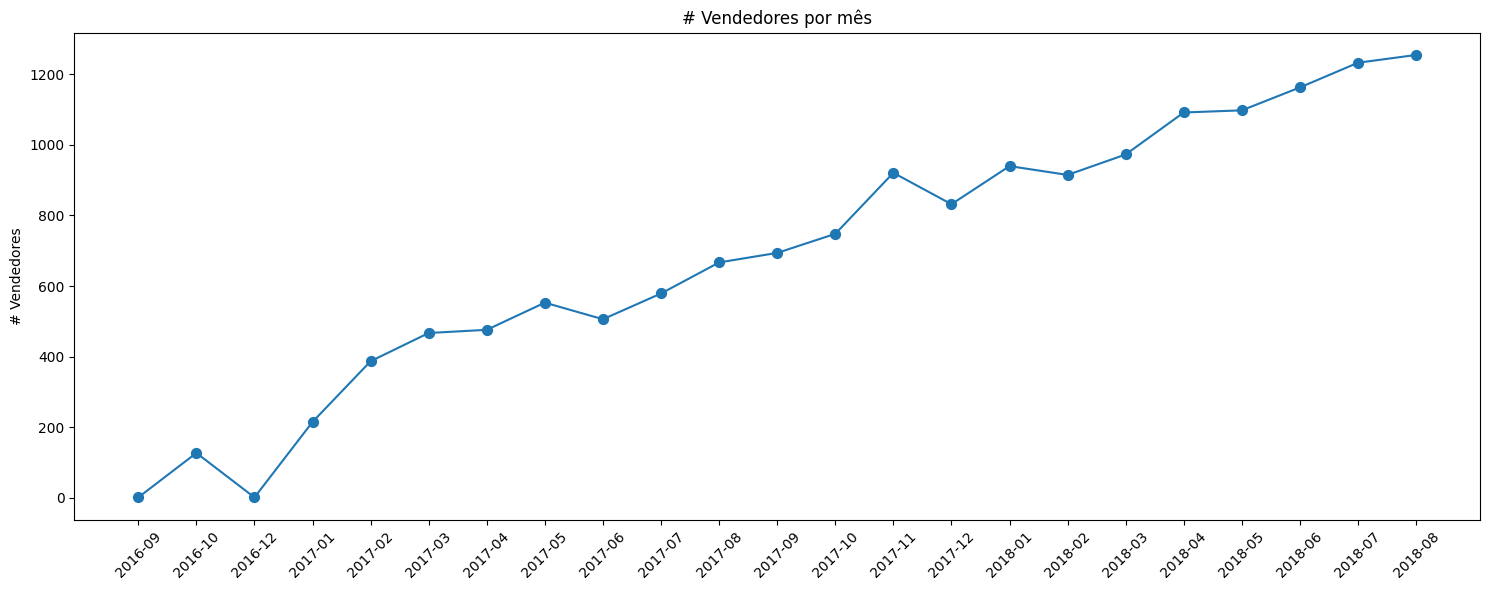

In [20]:
# Gráfico do número de vendores ao longo dos meses
y = df_total_vendas_agg['count'].values
x = df_total_vendas_agg['ano_mes'].astype(str).values

plt.figure(figsize=(15,6))
plt.plot(x, y)
plt.scatter(x, y, s=50)
plt.xlabel('')
plt.ylabel('# Vendedores')
plt.title('# Vendedores por mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Venda por categoria

In [21]:
df_total_vendas_cat = (
    df_delivered
    .groupby(['ano_mes', 'seller_id', 'product_category_name'])
    .agg(
        items_sold=('items_sold', 'sum'),
        total_price=('total_price', 'sum'),
    )
    .reset_index()
)

df_total_vendas_cat['total_price'] = df_total_vendas_cat['total_price'].round(2)

In [22]:
df_total_vendas_cat[df_total_vendas_cat['seller_id'] == '001cca7ae9ae17fb1caed9dfb1094831'].sort_values(by=['ano_mes', 'product_category_name'])

,ano_mes,seller_id,product_category_name,items_sold,total_price
457,2017-02,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,11,1098.90
1006,2017-03,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,17,1676.70
1689,2017-04,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,15,1708.20
2385,2017-05,001cca7ae9ae17fb1caed9dfb1094831,construcao_ferramentas_construcao,1,99.99
2386,2017-05,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,25,2540.00
3211,2017-06,001cca7ae9ae17fb1caed9dfb1094831,construcao_ferramentas_construcao,1,99.99
3212,2017-06,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,21,2113.50
3964,2017-07,001cca7ae9ae17fb1caed9dfb1094831,construcao_ferramentas_construcao,5,499.95
3965,2017-07,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,20,1984.00
4848,2017-08,001cca7ae9ae17fb1caed9dfb1094831,construcao_ferramentas_construcao,3,303.00


In [23]:
df_total_vendas_cat[df_total_vendas_cat['seller_id'] == 'b335c59ab742f751a85db9c411a86739'].sort_values(by=['ano_mes', 'product_category_name'])

,ano_mes,seller_id,product_category_name,items_sold,total_price
100,2016-10,b335c59ab742f751a85db9c411a86739,moveis_decoracao,2,133.80
380,2017-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,65.90
846,2017-02,b335c59ab742f751a85db9c411a86739,moveis_decoracao,2,142.00
2962,2017-05,b335c59ab742f751a85db9c411a86739,moveis_decoracao,3,193.38
2963,2017-05,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,1,44.90
4585,2017-07,b335c59ab742f751a85db9c411a86739,moveis_decoracao,2,214.80
4586,2017-07,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,6,385.55
5594,2017-08,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,72.90
5595,2017-08,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,2,279.80
6639,2017-09,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,59.74


In [24]:
df_total_vendas_cat_agg = (
    df_total_vendas_cat
    .groupby(['ano_mes', 'product_category_name'])
    .agg(
        count=('seller_id', 'count'),
        count_unique=('seller_id', 'nunique')
    )
    .reset_index()
    .sort_values(by=['ano_mes', 'product_category_name'])
)

df_total_vendas_cat_agg

,ano_mes,product_category_name,count,count_unique
0,2016-09,beleza_saude,1,1
1,2016-10,alimentos,1,1
2,2016-10,audio,1,1
3,2016-10,automotivo,8,8
4,2016-10,bebes,6,6
...,...,...,...,...
1209,2018-08,relogios_presentes,35,35
1210,2018-08,sinalizacao_e_seguranca,11,11
1211,2018-08,telefonia,44,44
1212,2018-08,telefonia_fixa,4,4


# Calendário

In [25]:
# Criando calendário para agregar semestralmente
calendario = pd.date_range(start='2016-01-01', end='2019-01-01', freq='MS')
df_calendario = pd.DataFrame({'data': calendario})

df_calendario['ano_mes'] = df_calendario['data'].dt.to_period('M')

df_calendario

,data,ano_mes
0,2016-01-01,2016-01
1,2016-02-01,2016-02
2,2016-03-01,2016-03
3,2016-04-01,2016-04
4,2016-05-01,2016-05
5,2016-06-01,2016-06
6,2016-07-01,2016-07
7,2016-08-01,2016-08
8,2016-09-01,2016-09
9,2016-10-01,2016-10


In [26]:
df_calendario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     37 non-null     datetime64[ns]
 1   ano_mes  37 non-null     period[M]     
dtypes: datetime64[ns](1), period[M](1)
memory usage: 724.0 bytes


# Clientes ativos nos últimos 90 dias

In [27]:
# Join entre os vendedores e o calendário para criar a granularidade desejada: ao final, cada venda cria uma linha para cada data do calendário

df_delivered_tmp['purchase_date'] = pd.to_datetime(df_delivered_tmp['purchase_date'])

df_cliente_ativo_tmp = (
    df_delivered_tmp[['purchase_date', 'seller_id', 'product_category_name', 'items_sold', 'total_price']]
    .merge(df_calendario[['data']], how='cross') # produto cartesiano entre as datas do calendário e os vendedores
)

# Filtrando apenas as vendas que aconteceram antes da data do calendário
mask = (df_cliente_ativo_tmp['purchase_date'] < df_cliente_ativo_tmp['data'])
df_cliente_ativo_tmp = df_cliente_ativo_tmp[mask]

# Calculando a última data de venda para cada vendedor em cada data do calendário
df_max_venda_cliente_ativo = (
    df_cliente_ativo_tmp
    .groupby(['data', 'seller_id'])
    .agg(
        data_ultima_venda=('purchase_date', 'max'),    
    )
    .reset_index()
)
df_cliente_ativo_tmp = df_cliente_ativo_tmp.merge(df_max_venda_cliente_ativo, on=['data', 'seller_id'], how='left')

# Calculando a diferença em dias entre a data do calendário e a última data de venda
df_cliente_ativo_tmp['dias_desde_ultima_venda'] = (df_cliente_ativo_tmp['data'] - df_cliente_ativo_tmp['data_ultima_venda']).dt.days

# Clientes ativos nos últimos 90 dias, ou seja, que fizeram pelo menos uma compra nos últimos 90 dias
df_cliente_ativo = df_cliente_ativo_tmp[df_cliente_ativo_tmp['dias_desde_ultima_venda'] < 90]

/var/folders/d3/vx1qt6593sx6_kwhfbzxfc8c0000gn/T/ipykernel_82837/1305176607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivered_tmp['purchase_date'] = pd.to_datetime(df_delivered_tmp['purchase_date'])


In [28]:
df_cliente_ativo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902301 entries, 0 to 1198148
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   purchase_date            902301 non-null  datetime64[ns]
 1   seller_id                902301 non-null  object        
 2   product_category_name    902301 non-null  object        
 3   items_sold               902301 non-null  int64         
 4   total_price              902301 non-null  float64       
 5   data                     902301 non-null  datetime64[ns]
 6   data_ultima_venda        902301 non-null  datetime64[ns]
 7   dias_desde_ultima_venda  902301 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(2)
memory usage: 62.0+ MB


In [29]:
df_cliente_ativo_tmp[df_cliente_ativo_tmp['seller_id'] == 'b335c59ab742f751a85db9c411a86739'].sort_values(by=['data', 'purchase_date'])

,purchase_date,seller_id,product_category_name,items_sold,total_price,data,data_ultima_venda,dias_desde_ultima_venda
514,2016-10-04,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,67.90,2016-11-01,2016-10-10,22
6562,2016-10-10,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,65.90,2016-11-01,2016-10-10,22
515,2016-10-04,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,67.90,2016-12-01,2016-10-10,52
6563,2016-10-10,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,65.90,2016-12-01,2016-10-10,52
516,2016-10-04,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,67.90,2017-01-01,2016-10-10,83
...,...,...,...,...,...,...,...,...
433246,2017-08-30,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,1,139.90,2019-01-01,2017-12-12,385
458342,2017-09-11,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,59.74,2019-01-01,2017-12-12,385
472470,2017-09-17,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,1,16.50,2019-01-01,2017-12-12,385
533725,2017-10-15,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,1,15.00,2019-01-01,2017-12-12,385


In [30]:
df_cliente_ativo[df_cliente_ativo['seller_id'] == 'b335c59ab742f751a85db9c411a86739'].sort_values(by=['data', 'purchase_date'])

,purchase_date,seller_id,product_category_name,items_sold,total_price,data,data_ultima_venda,dias_desde_ultima_venda
514,2016-10-04,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,67.90,2016-11-01,2016-10-10,22
6562,2016-10-10,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,65.90,2016-11-01,2016-10-10,22
515,2016-10-04,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,67.90,2016-12-01,2016-10-10,52
6563,2016-10-10,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,65.90,2016-12-01,2016-10-10,52
516,2016-10-04,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,67.90,2017-01-01,2016-10-10,83
...,...,...,...,...,...,...,...,...
433236,2017-08-30,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,1,139.90,2018-03-01,2017-12-12,79
458332,2017-09-11,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,59.74,2018-03-01,2017-12-12,79
472460,2017-09-17,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,1,16.50,2018-03-01,2017-12-12,79
533715,2017-10-15,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,1,15.00,2018-03-01,2017-12-12,79


In [31]:
df_cliente_ativo.sort_values(by=['data', 'purchase_date'])

,purchase_date,seller_id,product_category_name,items_sold,total_price,data,data_ultima_venda,dias_desde_ultima_venda
0,2016-09-15,ecccfa2bb93b34a3bf033cc5d1dcdc69,beleza_saude,3,134.97,2016-10-01,2016-09-15,16
1,2016-09-15,ecccfa2bb93b34a3bf033cc5d1dcdc69,beleza_saude,3,134.97,2016-11-01,2016-10-10,22
28,2016-10-03,522620dcb18a6b31cd7bdf73665113a9,relogios_presentes,1,29.90,2016-11-01,2016-10-10,22
55,2016-10-03,f09b760d23495ac9a7e00d29b769007c,esporte_lazer,1,21.90,2016-11-01,2016-10-03,29
82,2016-10-03,45d33f715e24d15a6ccf5c17b3a23e3c,esporte_lazer,1,36.49,2016-11-01,2016-10-03,29
...,...,...,...,...,...,...,...,...
1198128,2018-08-29,5f2684dab12e59f83bef73ae57724e45,brinquedos,1,63.90,2018-11-01,2018-08-29,64
1198133,2018-08-29,67bf6941ba2f1fa1d02c375766bc3e53,moveis_cozinha_area_de_servico_jantar_e_jardim,2,418.00,2018-11-01,2018-08-29,64
1198138,2018-08-29,2a84855fd20af891be03bc5924d2b453,beleza_saude,1,45.90,2018-11-01,2018-08-29,64
1198143,2018-08-29,7d7866a99a8656a42c7ff6352a433410,artigos_de_festas,1,24.90,2018-11-01,2018-08-29,64


## Venda últimos 180 dias

In [32]:
# Calculando apenas as vendas feitas nos últimos 180 dias, dado que o cliente é ativo, ou seja, fez pelo menos uma compra nos últimos 90 dias
mask = df_cliente_ativo['purchase_date'] >= (df_cliente_ativo['data_ultima_venda'] - pd.Timedelta(days=180))
df_mask_180d = df_cliente_ativo[mask].copy()

# Agrupando para calcular por categoria as vendas anteriores de até 180 dias atrás, em relação ao mês de referência (data) 
df_venda_180d = (
    df_mask_180d
    .groupby(['data', 'seller_id'], as_index=False)
    .agg(
        items_sold=('items_sold','sum'),
        total_price=('total_price','sum'),
    )
)

df_venda_180d['total_price'] = df_venda_180d['total_price'].round(2)

In [33]:
df_venda_180d[df_venda_180d['seller_id'] == 'b335c59ab742f751a85db9c411a86739'].sort_values(by=['data'])

,data,seller_id,items_sold,total_price
86,2016-11-01,b335c59ab742f751a85db9c411a86739,2,133.80
213,2016-12-01,b335c59ab742f751a85db9c411a86739,2,133.80
340,2017-01-01,b335c59ab742f751a85db9c411a86739,2,133.80
533,2017-02-01,b335c59ab742f751a85db9c411a86739,3,199.70
904,2017-03-01,b335c59ab742f751a85db9c411a86739,5,341.70
1462,2017-04-01,b335c59ab742f751a85db9c411a86739,5,341.70
2133,2017-05-01,b335c59ab742f751a85db9c411a86739,5,341.70
2856,2017-06-01,b335c59ab742f751a85db9c411a86739,7,446.18
3607,2017-07-01,b335c59ab742f751a85db9c411a86739,7,446.18
4406,2017-08-01,b335c59ab742f751a85db9c411a86739,14,980.63


In [34]:
df_total_vendas[df_total_vendas['seller_id'] == 'b335c59ab742f751a85db9c411a86739'].sort_values(by=['ano_mes'])

,ano_mes,seller_id,items_sold,total_price
86,2016-10,b335c59ab742f751a85db9c411a86739,2,133.80
282,2017-01,b335c59ab742f751a85db9c411a86739,1,65.90
621,2017-02,b335c59ab742f751a85db9c411a86739,2,142.00
2062,2017-05,b335c59ab742f751a85db9c411a86739,4,238.28
3147,2017-07,b335c59ab742f751a85db9c411a86739,8,600.35
3796,2017-08,b335c59ab742f751a85db9c411a86739,3,352.70
4480,2017-09,b335c59ab742f751a85db9c411a86739,2,76.24
5212,2017-10,b335c59ab742f751a85db9c411a86739,1,15.00
6927,2017-12,b335c59ab742f751a85db9c411a86739,1,188.87


In [35]:
df_venda_180d.describe(include='number')

,items_sold,total_price
count,24547.000000,24547.000000
mean,25.711737,3069.941993
std,64.445339,7808.616129
min,1.000000,3.850000
25%,3.000000,269.900000
50%,8.000000,942.880000
75%,23.000000,2762.030000
max,1117.000000,184878.310000


In [36]:
df_venda_180d_agg = (
    df_venda_180d
    .groupby('data')
    .agg(
        count=('seller_id', 'count'),
        count_unique=('seller_id', 'nunique')
    )
    .reset_index()
    .sort_values(by=['data'])
)

df_venda_180d_agg

,data,count,count_unique
0,2016-10-01,1,1
1,2016-11-01,127,127
2,2016-12-01,127,127
3,2017-01-01,125,125
4,2017-02-01,215,215
5,2017-03-01,440,440
6,2017-04-01,606,606
7,2017-05-01,688,688
8,2017-06-01,741,741
9,2017-07-01,753,753


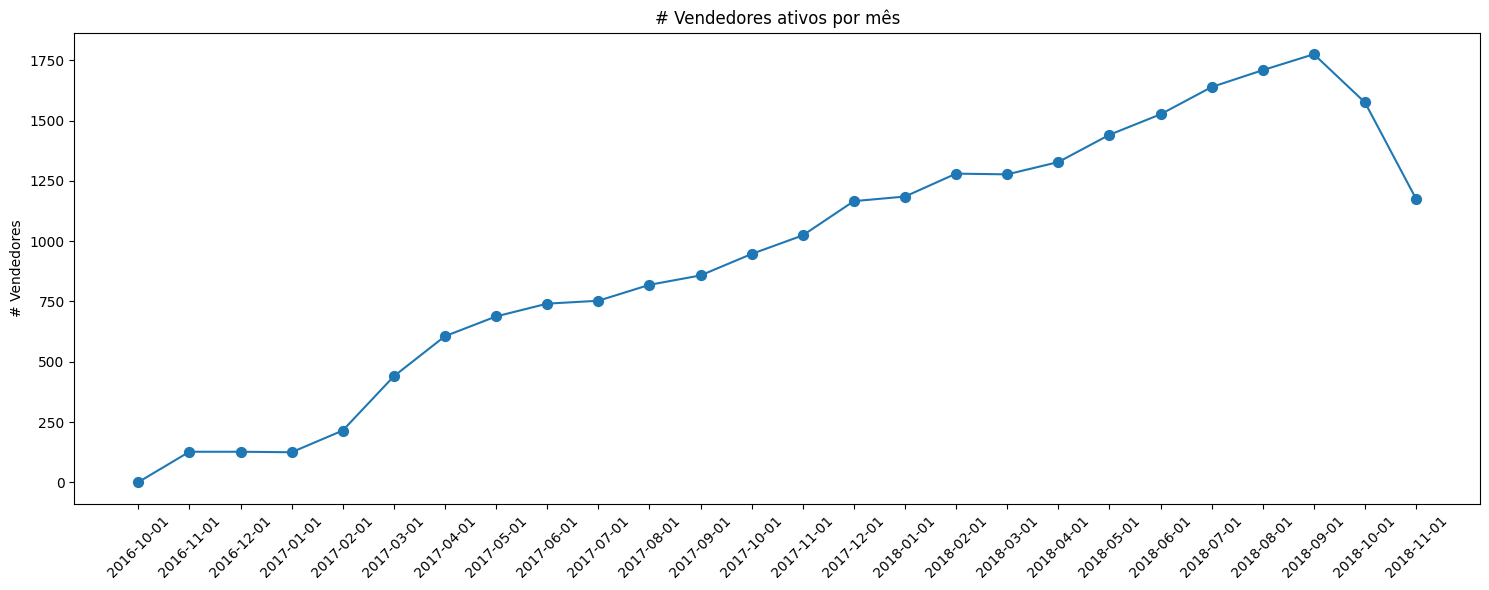

In [37]:
# Gráfico do número de vendedores ativos ao longo dos meses
y = df_venda_180d_agg['count'].values
x = df_venda_180d_agg['data'].astype(str).values

plt.figure(figsize=(15,6))
plt.plot(x, y)
plt.scatter(x, y, s=50)
plt.xlabel('')
plt.ylabel('# Vendedores')
plt.title('# Vendedores ativos por mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Venda últimos 180 dias por categoria

In [38]:
# Calculando apenas as vendas feitas nos últimos 180 dias, dado que o cliente é ativo, ou seja, fez pelo menos uma compra nos últimos 90 dias
mask = df_cliente_ativo['purchase_date'] >= (df_cliente_ativo['data_ultima_venda'] - pd.Timedelta(days=180))
df_mask_180d = df_cliente_ativo[mask].copy()

# Agrupando para calcular por categoria as vendas anteriores de até 180 dias atrás, em relação ao mês de referência (data) 
df_venda_180d_categoria = (
    df_mask_180d
    .groupby(['data', 'seller_id','product_category_name'], as_index=False)
    .agg(
        items_sold=('items_sold','sum'),
        total_price=('total_price','sum'),
    )
)

df_venda_180d_categoria['total_price'] = df_venda_180d_categoria['total_price'].round(2)

In [39]:
mask = ((df_venda_180d_categoria['seller_id'] == 'b335c59ab742f751a85db9c411a86739')
        & (df_venda_180d_categoria['product_category_name'] == 'moveis_decoracao'))

df_venda_180d_categoria[mask].sort_values(by=['data', 'product_category_name'])

,data,seller_id,product_category_name,items_sold,total_price
100,2016-11-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,2,133.80
259,2016-12-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,2,133.80
418,2017-01-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,2,133.80
708,2017-02-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,3,199.70
1288,2017-03-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,5,341.70
2219,2017-04-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,5,341.70
3375,2017-05-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,5,341.70
4679,2017-06-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,6,401.28
6099,2017-07-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,6,401.28
7648,2017-08-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,7,550.18


In [40]:
mask = ((df_total_vendas_cat['seller_id'] == 'b335c59ab742f751a85db9c411a86739')
        & (df_total_vendas_cat['product_category_name'] == 'moveis_decoracao'))

df_total_vendas_cat[mask].sort_values(by=['ano_mes', 'product_category_name'])

,ano_mes,seller_id,product_category_name,items_sold,total_price
100,2016-10,b335c59ab742f751a85db9c411a86739,moveis_decoracao,2,133.80
380,2017-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,65.90
846,2017-02,b335c59ab742f751a85db9c411a86739,moveis_decoracao,2,142.00
2962,2017-05,b335c59ab742f751a85db9c411a86739,moveis_decoracao,3,193.38
4585,2017-07,b335c59ab742f751a85db9c411a86739,moveis_decoracao,2,214.80
5594,2017-08,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,72.90
6639,2017-09,b335c59ab742f751a85db9c411a86739,moveis_decoracao,1,59.74


In [41]:
mask = ((df_venda_180d_categoria['seller_id'] == 'b335c59ab742f751a85db9c411a86739')
        & (df_venda_180d_categoria['product_category_name'] == 'utilidades_domesticas'))

df_venda_180d_categoria[mask].sort_values(by=['data', 'product_category_name'])

,data,seller_id,product_category_name,items_sold,total_price
4680,2017-06-01,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,1,44.90
6100,2017-07-01,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,1,44.90
7649,2017-08-01,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,7,430.45
9362,2017-09-01,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,9,710.25
11211,2017-10-01,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,10,726.75
13208,2017-11-01,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,11,741.75
15447,2017-12-01,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,11,741.75
17825,2018-01-01,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,11,885.72
20366,2018-02-01,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,11,885.72
23008,2018-03-01,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,11,885.72


In [42]:
mask = ((df_total_vendas_cat['seller_id'] == 'b335c59ab742f751a85db9c411a86739')
        & (df_total_vendas_cat['product_category_name'] == 'utilidades_domesticas'))

df_total_vendas_cat[mask].sort_values(by=['ano_mes', 'product_category_name'])

,ano_mes,seller_id,product_category_name,items_sold,total_price
2963,2017-05,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,1,44.90
4586,2017-07,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,6,385.55
5595,2017-08,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,2,279.80
6640,2017-09,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,1,16.50
7719,2017-10,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,1,15.00
10318,2017-12,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,1,188.87


In [43]:
mask = (df_venda_180d_categoria['seller_id'] == 'b335c59ab742f751a85db9c411a86739')

df_venda_180d_categoria[mask].sort_values(by=['data', 'product_category_name'])

,data,seller_id,product_category_name,items_sold,total_price
100,2016-11-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,2,133.80
259,2016-12-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,2,133.80
418,2017-01-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,2,133.80
708,2017-02-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,3,199.70
1288,2017-03-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,5,341.70
2219,2017-04-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,5,341.70
3375,2017-05-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,5,341.70
4679,2017-06-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,6,401.28
4680,2017-06-01,b335c59ab742f751a85db9c411a86739,utilidades_domesticas,1,44.90
6099,2017-07-01,b335c59ab742f751a85db9c411a86739,moveis_decoracao,6,401.28


In [44]:
mask = (df_venda_180d['seller_id'] == 'b335c59ab742f751a85db9c411a86739')

df_venda_180d[mask].sort_values(by=['data'])

,data,seller_id,items_sold,total_price
86,2016-11-01,b335c59ab742f751a85db9c411a86739,2,133.80
213,2016-12-01,b335c59ab742f751a85db9c411a86739,2,133.80
340,2017-01-01,b335c59ab742f751a85db9c411a86739,2,133.80
533,2017-02-01,b335c59ab742f751a85db9c411a86739,3,199.70
904,2017-03-01,b335c59ab742f751a85db9c411a86739,5,341.70
1462,2017-04-01,b335c59ab742f751a85db9c411a86739,5,341.70
2133,2017-05-01,b335c59ab742f751a85db9c411a86739,5,341.70
2856,2017-06-01,b335c59ab742f751a85db9c411a86739,7,446.18
3607,2017-07-01,b335c59ab742f751a85db9c411a86739,7,446.18
4406,2017-08-01,b335c59ab742f751a85db9c411a86739,14,980.63


In [45]:
df_venda_180d_categoria.describe(include='number')

,items_sold,total_price
count,49846.000000,49846.000000
mean,12.661919,1511.813708
std,38.951014,4871.791799
min,1.000000,2.550000
25%,1.000000,109.900000
50%,3.000000,329.900000
75%,10.000000,1126.770000
max,1108.000000,151382.830000


In [46]:
df_venda_180d_categoria_agg = (
    df_venda_180d_categoria
    .groupby(['data', 'product_category_name'])
    .agg(
        count=('seller_id', 'count'),
        count_unique=('seller_id', 'nunique')
    )
    .reset_index()
    .sort_values(by=['data', 'product_category_name'])
)

df_venda_180d_categoria_agg

,data,product_category_name,count,count_unique
0,2016-10-01,beleza_saude,1,1
1,2016-11-01,alimentos,1,1
2,2016-11-01,audio,1,1
3,2016-11-01,automotivo,8,8
4,2016-11-01,bebes,6,6
...,...,...,...,...
1512,2018-11-01,sinalizacao_e_seguranca,26,26
1513,2018-11-01,tablets_impressao_imagem,1,1
1514,2018-11-01,telefonia,60,60
1515,2018-11-01,telefonia_fixa,15,15


In [47]:
df_venda_180d_categoria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49846 entries, 0 to 49845
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data                   49846 non-null  datetime64[ns]
 1   seller_id              49846 non-null  object        
 2   product_category_name  49846 non-null  object        
 3   items_sold             49846 non-null  int64         
 4   total_price            49846 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.9+ MB


# Master table

In [48]:
df_venda_180d_categoria = df_venda_180d_categoria.rename(columns={'items_sold': 'qtd', 'total_price': 'recbruta'})

df_pivoted = (
    pd
    .pivot_table(
        df_venda_180d_categoria,
        index=['seller_id', 'data'],                 
        columns='product_category_name',  
        values=['qtd', 'recbruta'],
        aggfunc='sum',
        fill_value=0    
    )
    .reset_index()
)

# transforma MultiIndex em strings do tipo items_sold_categoria
df_pivoted.columns = ['{}_{}'.format(col[0], col[1]) for col in df_pivoted.columns]
df_pivoted = df_pivoted.rename(columns={'seller_id_': 'seller_id', 'data_': 'data'})

# Join com as vendas de 180 dias totais
df_venda_180d = df_venda_180d.rename(columns={'items_sold': 'qtd_produto_total', 'total_price': 'recbruta_total'})

df = df_pivoted.merge(df_venda_180d, on=['data', 'seller_id'], how='inner')

In [49]:
df_pivoted.info()
print(df_pivoted.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24547 entries, 0 to 24546
Columns: 142 entries, seller_id to recbruta_utilidades_domesticas
dtypes: datetime64[ns](1), float64(70), int64(70), object(1)
memory usage: 26.6+ MB
(24547, 142)


In [50]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24547 entries, 0 to 24546
Columns: 144 entries, seller_id to recbruta_total
dtypes: datetime64[ns](1), float64(71), int64(71), object(1)
memory usage: 27.0+ MB
(24547, 144)


In [51]:
df_pivoted.head()

,seller_id,data,qtd_agro_industria_e_comercio,qtd_alimentos,qtd_alimentos_bebidas,qtd_artes_e_artesanato,qtd_artigos_de_festas,qtd_artigos_de_natal,qtd_audio,qtd_automotivo,...,recbruta_pet_shop,recbruta_portateis_casa_forno_e_cafe,recbruta_portateis_cozinha_e_preparadores_de_alimentos,recbruta_relogios_presentes,recbruta_seguros_e_servicos,recbruta_sinalizacao_e_seguranca,recbruta_tablets_impressao_imagem,recbruta_telefonia,recbruta_telefonia_fixa,recbruta_utilidades_domesticas
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0015a82c2db000af6aaaf3ae2ecb0532,2017-11-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0015a82c2db000af6aaaf3ae2ecb0532,2017-12-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0015a82c2db000af6aaaf3ae2ecb0532,2018-01-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001cca7ae9ae17fb1caed9dfb1094831,2017-03-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df.columns.tolist()

['seller_id',
 'data',
 'qtd_agro_industria_e_comercio',
 'qtd_alimentos',
 'qtd_alimentos_bebidas',
 'qtd_artes_e_artesanato',
 'qtd_artigos_de_festas',
 'qtd_artigos_de_natal',
 'qtd_audio',
 'qtd_automotivo',
 'qtd_bebes',
 'qtd_bebidas',
 'qtd_beleza_saude',
 'qtd_brinquedos',
 'qtd_cama_mesa_banho',
 'qtd_casa_conforto',
 'qtd_casa_construcao',
 'qtd_cds_dvds_musicais',
 'qtd_cine_foto',
 'qtd_climatizacao',
 'qtd_consoles_games',
 'qtd_construcao_ferramentas_construcao',
 'qtd_construcao_ferramentas_ferramentas',
 'qtd_construcao_ferramentas_iluminacao',
 'qtd_construcao_ferramentas_jardim',
 'qtd_construcao_ferramentas_seguranca',
 'qtd_cool_stuff',
 'qtd_dvds_blu_ray',
 'qtd_eletrodomesticos',
 'qtd_eletronicos',
 'qtd_eletroportateis',
 'qtd_esporte_lazer',
 'qtd_fashion_bolsas_e_acessorios',
 'qtd_fashion_calcados',
 'qtd_fashion_esporte',
 'qtd_fashion_roupa_feminina',
 'qtd_fashion_roupa_infanto_juvenil',
 'qtd_fashion_roupa_masculina',
 'qtd_fashion_underwear_e_moda_praia'

In [53]:
mask = (df_pivoted['seller_id'] == 'b335c59ab742f751a85db9c411a86739')

df[mask].sort_values(by=['data'])

,seller_id,data,qtd_agro_industria_e_comercio,qtd_alimentos,qtd_alimentos_bebidas,qtd_artes_e_artesanato,qtd_artigos_de_festas,qtd_artigos_de_natal,qtd_audio,qtd_automotivo,...,recbruta_portateis_cozinha_e_preparadores_de_alimentos,recbruta_relogios_presentes,recbruta_seguros_e_servicos,recbruta_sinalizacao_e_seguranca,recbruta_tablets_impressao_imagem,recbruta_telefonia,recbruta_telefonia_fixa,recbruta_utilidades_domesticas,qtd_produto_total,recbruta_total
17289,b335c59ab742f751a85db9c411a86739,2016-11-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2,133.80
17290,b335c59ab742f751a85db9c411a86739,2016-12-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2,133.80
17291,b335c59ab742f751a85db9c411a86739,2017-01-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2,133.80
17292,b335c59ab742f751a85db9c411a86739,2017-02-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3,199.70
17293,b335c59ab742f751a85db9c411a86739,2017-03-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,5,341.70
17294,b335c59ab742f751a85db9c411a86739,2017-04-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,5,341.70
17295,b335c59ab742f751a85db9c411a86739,2017-05-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,5,341.70
17296,b335c59ab742f751a85db9c411a86739,2017-06-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.90,7,446.18
17297,b335c59ab742f751a85db9c411a86739,2017-07-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.90,7,446.18
17298,b335c59ab742f751a85db9c411a86739,2017-08-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,430.45,14,980.63


# Salva os dados

In [54]:
df.to_csv("../data/processed/tb_book_sellers.csv", index=False)